## Calculating the principal stresses

This notebook explores the procedure for calculating the principal components of a stress tensor.

A state of stress in tensor notation is expressed as:
$$
\sigma_{ij} = 
\begin{bmatrix}
\sigma_{xx} & \sigma_{xy} & \sigma_{xz} \\
\sigma_{xy} & \sigma_{yy} & \sigma_{yz} \\
\sigma_{xz} & \sigma_{yz} & \sigma_{zz}
\end{bmatrix}
$$

It is always possible to find a set of axes along which the shear stress terms vanish. In this case $\sigma_1$, $\sigma_2$ and $\sigma_3$ are called the principal stresses. The magnitudes of the principal stresses $\sigma_p$ are the roots of:
$$
\sigma_p^3 - I_1 \sigma_p^2 - I_2 \sigma_p - I_3 = 0
$$
where $I_1$, $I_2$ and $I_3$ are called the invariants of the stress tensor:
$$
\begin{aligned}
I_1 = & \sigma_{xx} + \sigma_{yy} + \sigma_{zz} \\
I_2 = & \sigma_{xy}^2 + \sigma_{xz}^2 + \sigma_{yz}^2 - \sigma_{yy}\sigma_{xx} - \sigma_{zz}\sigma_{xx} - \sigma_{xx}\sigma_{yy} \\
I_3 = & \sigma_{xx}\sigma_{yy}\sigma_{zz} + 2\sigma_{yz}\sigma_{xz}\sigma_{xy} - \sigma_{xx}\sigma_{yz}^2 - \sigma_{yy}\sigma_{xz}^2 - \sigma_{zz}\sigma_{xy}^2
\end{aligned}
$$

### An example in Python

For the calculation of the roots $\sigma_p$ we will use the Python library `functions` that includes functions to calculate the stress tensor invariants and the principal stresses in terms of the components of the stress tensor. Execute the cell below to load the library.

In [1]:
import functions

### Define a stress tensor

Set the values of the stresses in the cell below and execute it. The stress tensor will be refreshed with the new values.

In [2]:
sx = 10
sy = 5
sz = 7
sxy = -3
sxz = 4
syz = 2

functions.print_tensor(sx, sy, sz, sxy, sxz, syz)

[[10 -3  4]
 [-3  5  2]
 [-3  2  7]]


### Determine the invariants

Execute the cell below to determine the invariants of the stress tensor.

In [3]:
i1, i2, i3 = functions.calculate_invariants(sx, sy, sz, sxy, sxz, syz)
print('I1 = %s' % i1)
print('I2 = %s' % i2)
print('I3 = %s' % i3)

I1 = 22
I2 = -126
I3 = 119


### Calculate the principal stresses

Execute the cell below to calculate the stress tensor in principal directions.

In [4]:
s1, s2, s3 = functions.principal_stresses(sx, sy, sz, sxy, sxz, syz)
functions.print_tensor(s1, s2, s3)

[[13.0324921   0.          0.        ]
 [ 0.          7.79630966  0.        ]
 [ 0.          0.          1.17119824]]


### Mohr's circles

To visualize the Mohr's circles, we will use the `plot_Mhor_circles` function. Execute the cell below to show them.

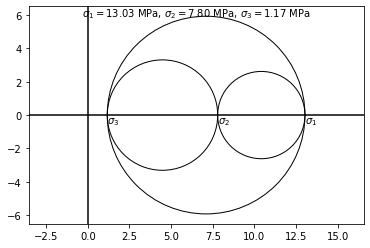

In [5]:
functions.plot_Mhor_circles(s1, s2, s3)

## Effective stress

The definition of a effective stress $\overline\sigma$ for a yield criterion is useful such that yielding occurs when the magnitude of $\overline\sigma$ reaches the critical value.

For the von Mises yield criterion, the effective stress in terms of the principal stresses is given by:
$$
\overline\sigma = \sqrt{\frac{1}{2}\left[ (\sigma_1-\sigma_2)^2 + (\sigma_2-\sigma_3)^2 + (\sigma_3-\sigma_1)^2 \right] }
$$
and for the Tresca yield criterion:
$$
\overline\sigma = \sigma_\max - \sigma_\min
$$

Execute the cell below to calculate the effective stress for the exercise above.

In [6]:
print('Effective stress (Mises) = %0.2f MPa' % functions.mises(s1, s2, s3))
print('Effective stress (Tresca) = %0.2f MPa' % functions.tresca(s1, s2, s3))

Effective stress (Mises) = 10.30 MPa
Effective stress (Tresca) = 11.86 MPa
